# Esame di Metodi Numerici - 6 Luglio 2023
## Turno II -- Ore 11.45

## Esercizio 1


Nel file ``Test_II.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3.

In [54]:
from scipy.io import loadmat
import SolveTriangular
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

dati = loadmat('Test_II.mat')
A1=dati["A1"]
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)
A2=dati["A2"]
A2=A2.astype(float)
b2=dati["b2"]
b2=b2.astype(float)
A3=dati["A3"]
A3=A3.astype(float)
b3=dati["b3"]
b3=b3.astype(float)

 Risolvere i 3 sistemi lineari aventi ciascuno di essi come matrice dei coefficienti A1 e termine noto b1, A2 e termine noto b2, A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.

matrice A1 15x15
marice A1 mal condizionata


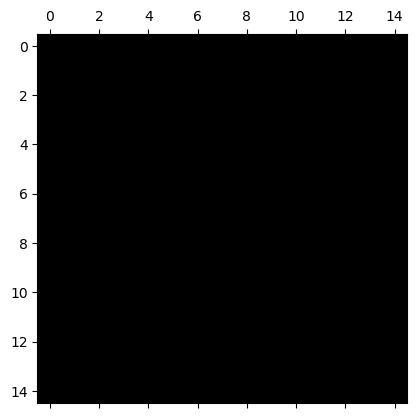

In [55]:
# Studio la matrice A1 per comprendere quale metodo utilizzare
m, n = A1.shape
print(f'matrice A1 {m}x{n}') # piccola e quadrata 
if npl.cond(A1) < 100: 
    print('matrice A1 ben condizionata')
elif npl.cond(A1) > 10**4: 
    print('marice A1 mal condizionata') # uso QR

plt.spy(A1)

In [56]:
""" 
Q matrice quadrata e ortogonale 
R triangolare SUPERIORE e non singolare 
Vale A = Q @ R
"""
def QR(A1, b): 
    Q, R = npl.qr(A1)
    x, flag = SolveTriangular.Usolve(R, Q.T @ b)
    if flag != 0: 
        print('metodo non applicabile')
        return None
    return x

In [57]:
x1 = QR(A1, b1)
print(f'A1 x1 = b1 => x1 = {x1}')

A1 x1 = b1 => x1 = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


matrice A2 15x6
A2 ben condizionata


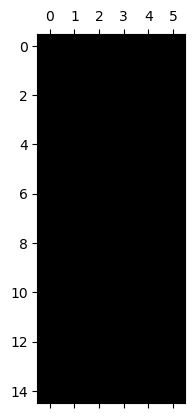

In [58]:
# matrice A2
m, n = A2.shape
print(f'matrice A2 {m}x{n}') # piccola ma rettangolare
# studio il condizionamento 
if npl.cond(A2) < 100: 
    print(f'A2 ben condizionata') #equazioni normali
elif npl.cond(A2) > 10**4:
    print(f'A2 mal condizionata') # SVDLS
else: print('A2 mediamente mal condizionata') # qrLS

plt.spy(A2)

In [59]:
def eqnorm(A,b):
#Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G = A.T @ A    
    f = A.T @ b
    L = npl.cholesky(G)
    U = L.T   
    z, flag = SolveTriangular.Lsolve(L, f)
    if flag == 0:
        x, flag = SolveTriangular.Usolve(U, z)
    
    return x

In [60]:
x2 = eqnorm(A2, b2)
print(f'A2 x2 = b2 => x2 = {x2}')

A2 x2 = b2 => x2 = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


A3 è 225x225
A3 non simmetrica
A3 ben condizionata


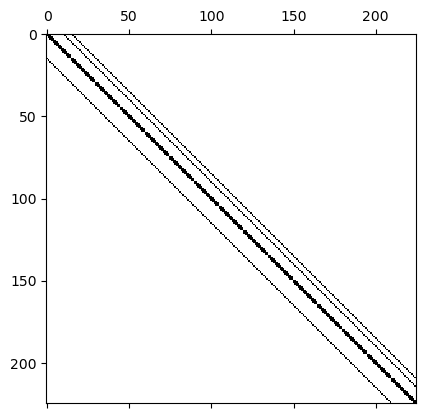

In [67]:
# matrice A3 
m, n = A3.shape
print(f'A3 è {m}x{n}') # grande e quadrata
if np.all(A3 == A3.T): 
    print('A3 simmetrica')
    if np.all(npl.eigvals(A3) > 0): 
        print('A3 definita positiva')
    else: print('A3 non definita positiva')
else: print('A3 non simmetrica')

if npl.cond(A3) < 100: 
    print('A3 ben condizionata')
elif npl.cond(A3) > 10**4:
    print('A3 mal condizionata')
else: print('A3 mediamente mal condizionata')
plt.spy(A3)

In [65]:
def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)

    E = np.tril(A, -1)
    F = np.triu(A, 1)
    N = - (E + F) 
    T = invM @ N
 
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while er_vet >= toll and it < it_max:
        x = (T @ x0) + (invM @ b)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [66]:
x0 = np.array([0] * n).T
toll = 1e-6
itmax = 2000 

x3 = jacobi(A3, b3, x0, toll, itmax)
print(f'x3 soluzione di A3 x3 = b3 è {x3}')

raggio spettrale jacobi 0.08830920241884316


TypeError: '>=' not supported between instances of 'list' and 'float'

Verificare se le matrici sono malcondizionate, dire teoricamente cosa questo implica e verificarlo sperimentalmente.

Condizionamento già calcolato sopra per le 3 matrici per la scelta del metodo. 
- A1 è mal condizionata
- A2 è ben condizionata
- A3 è ben condizionata

# Esercizio 2

Data l'equazione di 2° grado $$\frac{1}{2} x^2+2bx-c=0$$

con $b=10^7, c=10^{-i},i=-5,\cdots,12 $

a) Scrivere le due formule algebriche per ricavare i valori delle 2 soluzioni
                                                                                    1 punto

In [24]:
import numpy as np

In [22]:
a = 1
b = 4*10**7
c_val = [-2*10**(-i) for i in range (-5, 13)]

for c in c_val:
    x1 = (- b + np.sqrt(b**2 - 4 * a * c)) / (2*a)
    x2 = (- b - np.sqrt(b**2 - 4 * a * c)) / (2*a)

print(f'soluzione x1 = {x1}')
print(f'soluzione x2 = {x2}')

soluzione x1 = 0.0
soluzione x2 = -40000000.0


b) Studiare l'indice di condizionamento delle 2 formule algebriche, facendo uso del risultato teorico visto a lezione riguardo l'indice di condizionamento della valutazione di una funzione. (Spiegare il significato di problema mal condizionato) e dire quale delle due formule è malcondizionata. Per quali valori di $c$ il problema risulta ben condizionato?

                                                                                    5 punti

In [26]:
# calcolo la derivata rispetto a x1 e x2
# scelgo delta = x => derivo rispetto ciò
x1_der = - 1/(4 * a * ((b**2 - 4 * a * c)**(1/2)))
x2_der = 1/(4 * a * ((b**2 - 4 * a * c)**(1/2)))

# K = |f'(x) / f(x) * x|
K1 = np.abs( (x1_der / x1) * (b**2 - 4 * a * c) ) 
if K1 <1: 
    print('soluzione x1 ben condizionata')
else: print('soluzione x1 mal condizionata')

K2 = np.abs( (x2_der / x2) * (b**2 - 4 * a * c) ) 
if K2 <1: 
    print('soluzione x2 ben condizionata')
else: print('soluzione x2 mal condizionata')

soluzione x1 mal condizionata
soluzione x2 ben condizionata


C:\Users\lisav\AppData\Local\Temp\ipykernel_2700\3424723918.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  K1 = np.abs( (x1_der / x1) * (b**2 - 4 * a * c) )


c) Nel caso in cui una delle due formule risulti mal condizionata, proporre una soluzione algebricamente equivalente che non sia malcondizionata.

                                                                                    3 punti

In [27]:
# soluzione x1 mal condizionata => sfrutto la relazione x1 * x2 = c / a 
x1_new = x2 * c / a
print(f'nuova soluzione x1 meglio condizionata = {x1_new}') 

nuova soluzione x1 meglio condizionata = 7.999999999999999e-05


Ricordiamo che l'operazione di somma, nell'insieme dei numeri di macchina, è pericolosa. In particolare, risulta non stabile nel caso in cui si sommino due valori vicini in modulo, ma di segno opposto. 
Ciò è accaduto nel trovare la soluzione x. Dunque, sfrutto la relazione x1*x2 = c/a per trovare la soluzione mal condizionata.

                                                                        Totale 9 punti

## Domanda intelligenza artificiale

 Limiti delle reti MLP (multilayer Perceptron) ed introduzione delle Reti neurali Convoluzionali. 
- Architettura di una rete neurale convoluzionale: strati convoluzionali, attivazione non lineare e pooling + parte fully connected.
- Loss function per il task della regressione.  Training di una rete. 
- Cenni sull'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi ditutti i layer .
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch.
                                                                                [7  punti]
